# PROJETO 6

## Denoising noisy signal

- EKG Signal


In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [2]:
df = pd.read_csv('EKG_signals.csv',sep=',',names=['noisy','orig'])
df

,noisy,orig
0,920.23,963
1,929.06,987
2,1116.60,1024
3,1073.60,1073
4,1070.60,1134
...,...,...
995,953.24,1020
996,913.34,1020
997,961.08,1025
998,953.80,1030


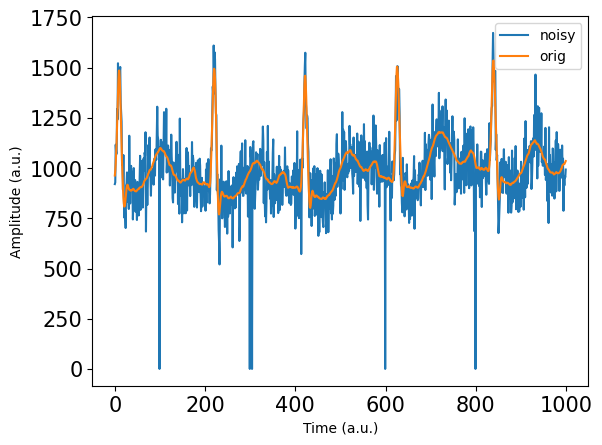

In [3]:
# plot the data
df.plot(fontsize=15)#,marker='o',linewidth=.1)
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

In [4]:
# copy the noisy version
df['filtered'] = df['noisy'].copy()
print(df)

       noisy  orig  filtered
0     920.23   963    920.23
1     929.06   987    929.06
2    1116.60  1024   1116.60
3    1073.60  1073   1073.60
4    1070.60  1134   1070.60
..       ...   ...       ...
995   953.24  1020    953.24
996   913.34  1020    913.34
997   961.08  1025    961.08
998   953.80  1030    953.80
999   992.79  1035    992.79

[1000 rows x 3 columns]


In [5]:
# median filter for low values

# threshold
thresh = 300

# find all data points above threshold
suprathreshpoints = np.where(df['noisy']<thresh)[0]

# apply median filter
k = 7
for i in suprathreshpoints:
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((len(df),i+k))
  df['filtered'][i] = np.median(df['noisy'][lowbnd:uppbnd])

C:\Users\Estela\AppData\Local\Temp\ipykernel_14688\3782463768.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['filtered'][i] = np.median(df['noisy'][lowbnd:uppbnd])
C:\Users\Estela\AppData\Local\Temp\ipykernel_14688\3782463768.py:14:

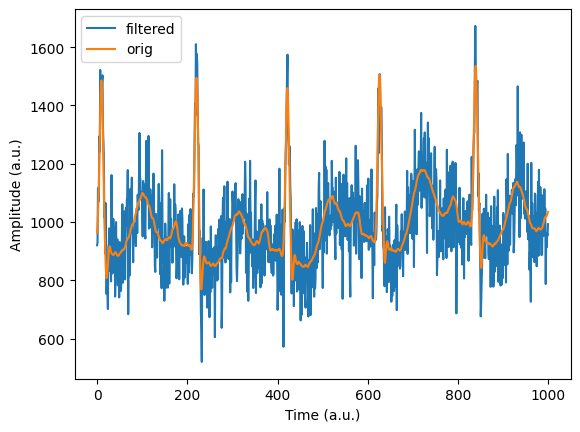

In [6]:
# plot the data
df[['filtered','orig']].plot()
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

In [7]:
# now for a mean-smoothing filter
k = 5

for i in range(len(df)):
  lowbnd = np.max((0,i-k))
  uppbnd = np.min((len(df),i+k))
  df['filtered'][i] = np.mean(df['noisy'][lowbnd:uppbnd])


C:\Users\Estela\AppData\Local\Temp\ipykernel_14688\1159556589.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['filtered'][i] = np.mean(df['noisy'][lowbnd:uppbnd])
C:\Users\Estela\AppData\Local\Temp\ipykernel_14688\1159556589.py:7: Set

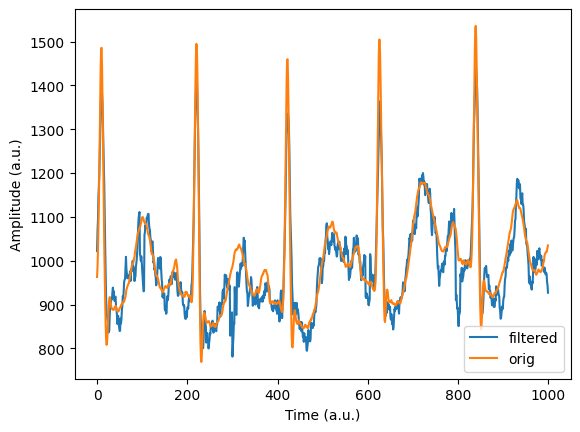

In [8]:
# plot the data
df[['filtered','orig']].plot()
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()